# Regresión Logística

En esta notebook usaremos la implementación de scikit-learn de la regresión logística [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Primero veremos algunos ejemplos didacticos para entender el funcionamiento del clasificador. Después, resolveremos ejemplos usando algunos datasets reales.

Recuerda la simbología de las secciones:

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/09-Regresion-Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Función para graficar la frontera de decisión

from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

def graficar_FD(X,y,clf,h=0):
    '''
    X es todas las instancias las cuales incluiremos en el gráfico
    '''
    assert X.shape[1] == 2   # Sólo funciona para datos en dimensión 2
    feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:,0].min()-h, X[:, 0].max()+h),
    np.linspace(X[:, 1].min()-h, X[:, 1].max()+h)
    )
    grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
    y_grid_pred = clf.predict(grid)
    y_grid_pred = y_grid_pred.reshape(feature_1.shape)
    display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_grid_pred
    )
    display.plot()
    display.ax_.scatter(
        X[:, 0], X[:, 1], c=y, edgecolor="black"
    )
    plt.show()
    return display.ax_

## Ejemplo 1(a)

Un ejemplo con datos unidimensionales

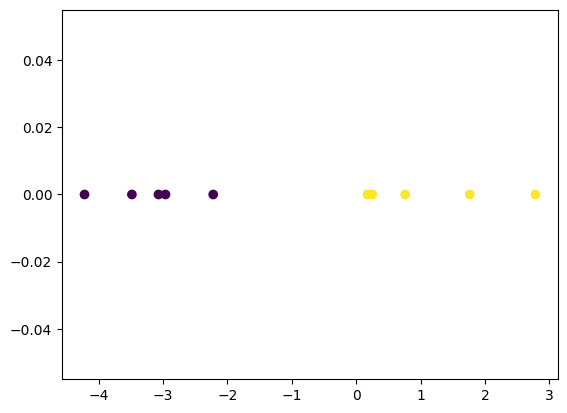

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=10,
                  n_features=1,
                  centers=2,
                  random_state=17)

plt.figure()
plt.scatter(x=X,y=[0 for x in X],c=y)
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)

probs = lr.predict_proba(X)
probs[:,1]

array([0.97715113, 0.19215937, 0.08301418, 0.99384032, 0.01729115,
       0.07289983, 0.84338764, 0.92040628, 0.85597763, 0.04387508])

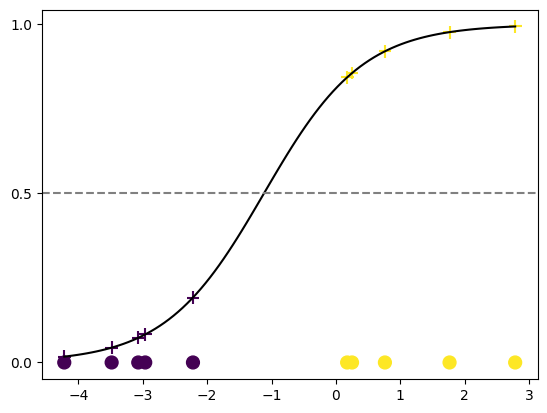

In [4]:
from math import e

def f(x):
    return w0+w1*x

def plog(x):
    return 1/(1+e**(-f(x)))

w0, w1 = lr.intercept_, lr.coef_[0]
xmin, xmax = np.min(X), np.max(X)
xs = np.linspace(xmin,xmax,100)

plt.figure()
plt.scatter(x=X,y=[0 for x in X],c=y,s=85)
plt.plot(xs,[plog(x) for x in xs],color='black')
plt.scatter(x=X,y=probs[:,1],c=y,marker='+',s=85)
plt.axhline(y=0.5,color='gray',linestyle='--')
plt.yticks([0,0.5,1])
plt.show()

## Ejemplo 2(a)

En el siguiente ejemplo vemos cómo generar fronteras de decisión más complejas.

In [5]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/binary-classification-data.csv'
df = pd.read_csv(url,header=None)
df

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


Observemos los datos

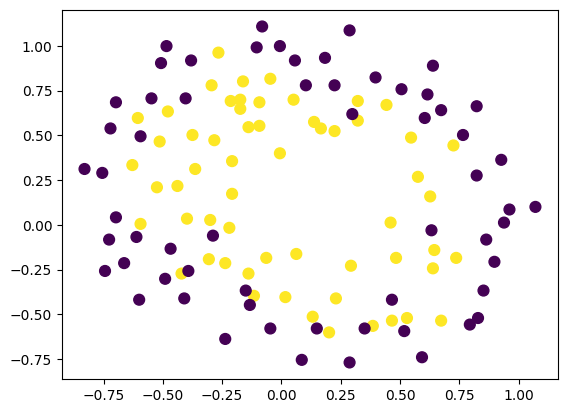

In [6]:
import matplotlib.pyplot as plt

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=60)
plt.show()

In [7]:
#@title Funciones para graficas las fronteras de decisión
import numpy as np

def make_meshgrid(x, y, h=.02):
    '''
    función para hacer la malla de puntos para colorear las regiones de decisión,
    la malla de puntos abarca la región donde se encuentran los puntos (x,y)
    'h' es el tamaño de paso
    '''
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

Hacemos una regresión logística con los parámetros por default y vemos su accuracy en el conjunto de entrenamiento y prueba.

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

print(f"Accuracy en el entrenamiento: {clf.score(X_train,y_train)}")
print(f"Accuracy en la prueba: {clf.score(X_test,y_test)}")

Accuracy en el entrenamiento: 0.5283018867924528
Accuracy en la prueba: 0.5833333333333334


Hacemos una regresión logística con polinomial features y vemos su accuracy en el conjunto de entrenamiento. La justificación de usar la regresión logística lineal, junto con polinomial features, para adaptar el módelo al caso polinomial es similar a la justificación en el caso de regresión lineal.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

p_feats = PolynomialFeatures(2,include_bias=False)
log_reg = LogisticRegression(penalty='l2', C=1, solver='newton-cholesky')

pl = Pipeline([('pf',p_feats),
               ('clf',log_reg)])
pl.fit(X,y)
pl.score(X,y)

0.8135593220338984

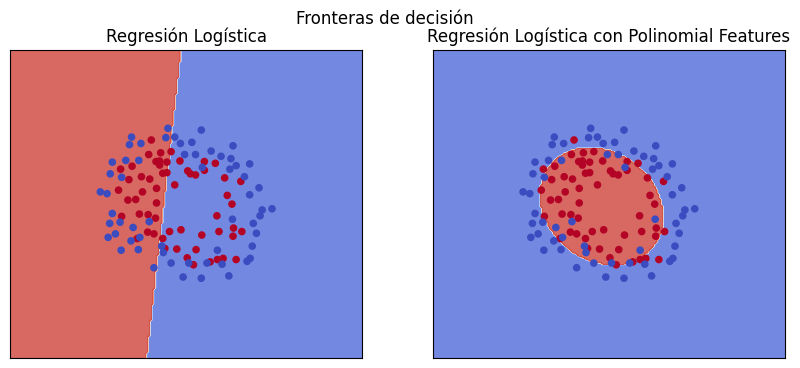

In [11]:
xx, yy = make_meshgrid(X[:,0], X[:,1])

fig, (ax1, ax2) = plt.subplots(1,2,dpi=100,figsize=(10,4)) # El parámetro dpi especifíca los puntos por pulgada (DPI) de la imagen

fig.suptitle("Fronteras de decisión")

plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('Regresión Logística')

plot_contours(ax2, pl, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=20)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('Regresión Logística con Polinomial Features')

plt.show()

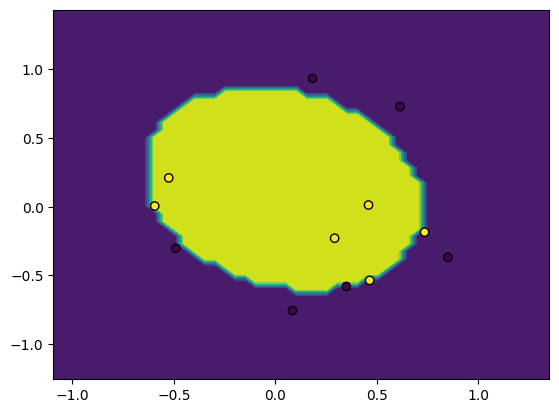

In [12]:
_ = graficar_FD(X_test,y_test,pl,h=0.5)

## Ejemplo 2(b)

En este ejemplo veremos el efecto de la regularización como herramienta para prevenir el *overfitting*. Veremos un dataset con muchas features y varias de ellas correlacionadas.

Además, usaremos la regularización L1 para eliminar features.

In [13]:
from sklearn.datasets import make_classification

# X, y = make_classification(n_samples=300,
#                            n_features=60,
#                            n_informative=20,
#                            n_repeated=3,
#                            n_redundant=20,
#                            n_classes=2,
#                            n_clusters_per_class=3,
#                            class_sep = 0.5,
#                            random_state=49)

X, y = make_classification(n_samples=500,
                           n_features=100,
                           n_informative=20,
                           n_repeated=3,
                           n_redundant=20,
                           n_classes=2,
                           class_sep = 0.5,
                           random_state=57)

### Entrenamiento y evaluación

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=1001)

Realicemos el entrenamiento. El rendimiento parece ser bueno en el conjunto de entrenamiento pero en el conjunto de prueba es malo. **Esta es una señal de overfitting**.

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty=None)
lr.fit(X_train,y_train)
print(f"Training score: {lr.score(X_train,y_train)}")
print(f"Test score: {lr.score(X_test,y_test)}")

Training score: 0.832
Test score: 0.632


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regularización

Usamos un clasificador con regularización

In [16]:
lr2 = LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
lr2.fit(X_train,y_train)
print(f"Training score: {lr2.score(X_train,y_train)}")
print(f"Test score: {lr2.score(X_test,y_test)}")

Training score: 0.7733333333333333
Test score: 0.688


🔽 Observemosla distribución de las magnitudes de los coeficientes

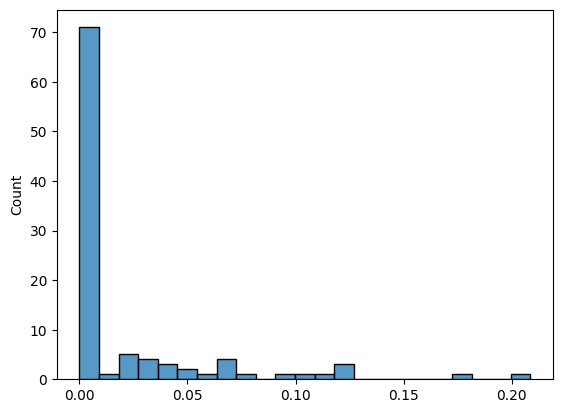

In [17]:
import seaborn as sns

normas = np.array([np.linalg.norm(x) for x in lr2.coef_[0]])

plt.figure()
sns.histplot(normas)
plt.show()

Podemos ver que hay varios coeficientes que son exactamente cero. Observar que el número es parecido al número de features redundantes + número de features repetidas

In [18]:
coefs = lr2.coef_
num_zeros = coefs[coefs==0].shape[0]
print(f"Número de coeficientes = 0: {num_zeros}")

Número de coeficientes = 0: 64


### ⚡ ROC-AUC

Usaremos el area bajo la curva ROC como métrica de rendimiento del clasificador. Para esto necesitamos las probabilidades de las predicciones.

Hay varias maneras de calcularlo:

* Si el clasificador tiene un método `predict_proba`, usamos [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).
* Si no, usamos [RocCurveDisplay.from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator)

Los siguientes estimadores tienen el método `predict_proba`: `SVC`, `DecisionTreeClassifier`, `RandomForestClassifier`

In [19]:
y_pred_probs = lr2.predict_proba(X_test)

y_pred_probs.shape

(125, 2)

In [20]:
y_pred = lr2.predict(X_test)

print(y_pred.shape)

print(y_pred_probs[:2])
print(y_pred[:2])

(125,)
[[0.95213751 0.04786249]
 [0.85526994 0.14473006]]
[0 0]


Al ser clasificación binaria, observa que sólo necesitamos la primer columna de la matriz `y_pred_probs`

In [21]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred_probs[:,1])
print(f"ROC-AUC score: {score}")

ROC-AUC score: 0.7730769230769231


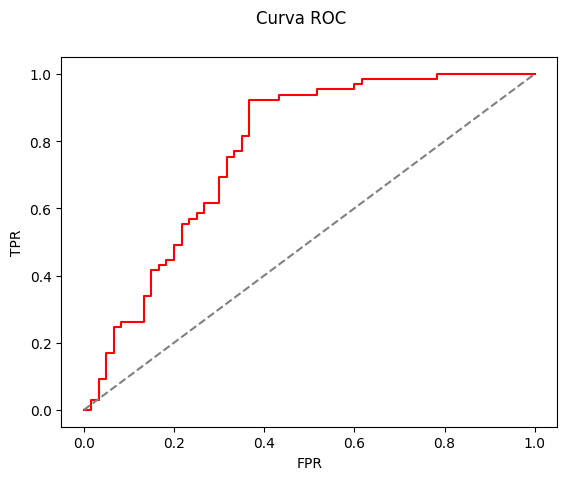

In [22]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])

plt.figure()
plt.suptitle("Curva ROC")
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## Ejemplo 3: MNIST

Usaremos el dataset de dígitos escritos a mano. Tenemos dos versiones:

* Usando `keras`, es el dataset MNIST completo. Son 70,000 imágenes de $28\times 28$, divididas en 60,000 de entrenamiento y 10,000 de prueba.
* Usando `sklearn`, es una versión reducida. Son 1797 imágenes de $8\times 8$.

Por practicidad, usaremos la segunda opción.

### Versión Keras

In [23]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [25]:
X_train[28]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  80, 189, 254, 255, 254, 254, 254, 174, 101,  31,  50,
        12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  80, 242, 253, 253, 253, 253, 253, 253, 25

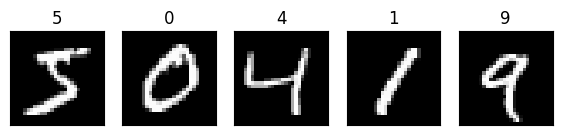

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,2))
for idx, (image, label) in enumerate(zip(X_train[:5], y_train[:5])):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

### Versión Scikit-learn

Obtenemos el dataset

In [27]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


Veamos cómo se ve una instancia del conjunto de datos

In [28]:
X[28]

array([ 0.,  0., 10., 11.,  4.,  0.,  0.,  0.,  0.,  0., 10., 15., 13.,
       13.,  1.,  0.,  0.,  0.,  8., 11.,  0., 14.,  4.,  0.,  0.,  0.,
        0., 13., 15., 13.,  0.,  0.,  0.,  1., 11., 16., 16.,  0.,  0.,
        0.,  0.,  1., 15.,  3.,  9., 10.,  0.,  0.,  0.,  0., 14.,  6.,
       15., 10.,  0.,  0.,  0.,  0.,  8., 14.,  7.,  1.,  0.,  0.])

Mostramos algunas instancias de entrenamiento.

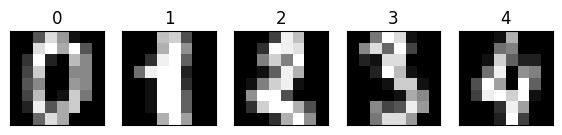

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,2))
for idx, (image, label) in enumerate(zip(X[:5], y[:5])):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

Hacemos la división en entrenamiento y prueba.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=128)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Entrenamiento y evaluación

Realizamos el entrenamiento y realizamos las predicciones sobre el conjunto de prueba. Reporta las métricas de rendimiento (accuracy, recall, precision) y la mátriz de confusión con el conjunto de prueba.

Accuracy: 0.953
Recall: 0.951
Precision: 0.946


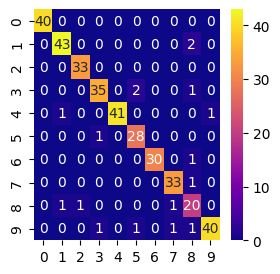

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred,average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred,average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

### ⚡ Validación cruzada

Usemos validación cruzada para evaluar el entrenamiento de nuestro modelo, [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

La validación cruzada es una técnica de validación de nuestro entrenamiento. La usamos cuando queremos evaluar el desempeño del modelo usando sólo el conjunto de entrenamiento.

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)

In [33]:
print(scores)
print(np.mean(scores))

[0.94444444 0.95138889 0.96167247 0.95121951 0.96515679]
0.9547764227642276


In [34]:
print(f"Accuracy en el conjunto de entrenamiento: {clf.score(X_train,y_train)}")
print(f"Accuracy CV en el conjunto de entrenamiento: {np.mean(scores)}")
print(f"Accuracy en el conjunto de prueba: {accuracy_score(y_test,y_pred)}")

Accuracy en el conjunto de entrenamiento: 0.9951287404314544
Accuracy CV en el conjunto de entrenamiento: 0.9547764227642276
Accuracy en el conjunto de prueba: 0.9527777777777777


### ⚡ ROC-AUC


In [35]:
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs.shape

(360, 10)

Veamos las probabilidades predichas y la etiqueta predicha

In [36]:
print(y_pred_probs[0])
print(y_pred[0])

[1.89125053e-06 5.45186444e-06 1.37376173e-15 1.42116696e-14
 9.99840200e-01 9.69157263e-18 1.93968241e-07 7.79190448e-05
 7.43439149e-05 5.09112967e-23]
4


Como son probabilidades, la suma de las componentes es 1

In [37]:
np.sum(y_pred_probs[0])

0.9999999999999999

Cuando se trata de un problema multiclase podemos escoger el enfoque `ovr` (one-vs-rest) o `ovo` (one-vs-one). En este caso, no se puede graficar *directamente* la curva ROC.

In [38]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred_probs,multi_class='ovr')
print(f"ROC-AUC score: {score}")

ROC-AUC score: 0.9975063227568542


## ⭕ Práctica *final* de clasificación

Vamos a retomar el dataset de la sesión pasada (dataset PIMA). El objetivo es tener el mejor modelo posible con cada uno de los siguientes algoritmos:

* SVM
* Decision Tree
* Random Forest
* Regresión Logística

Con esto haremos una comparación entre ellos.

Los pasos a seguir son:

1. Prepara el dataset para los algoritmo, recuerda que hay algunos valores faltantes. Además, recuerda reescalar los datos apropiadamente.

2. Usando como dataset el dataset preprocesado del paso anterior, realiza una busqueda de parámetros con cada algoritmo de acuerdo a las siguientes opciones:

* SVM
 * C: 0.1,1,10,100
 * kernel: lineal, polinomial, rbf
 * grados (polinomial): 2,3,5
* Decision Tree
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Random Forest
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Regresión Logística
 * C: 0.1,1,10
 * penalty: l1, l2, elasticnet, None

3. Considerando los 4 mejores modelos anteriores. ¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto toma en cuenta el accuracy en el conjunto de prueba.

In [39]:
# Importar las librerias necesarias
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
# Importar el dataset
url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Analisis exploratorio y preprocesamiento de datos

In [41]:
# Revisar estadisticas de las columnas numericas
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# Funcion para identificar los ceros en las siguientes columnas
cols_ceros = ['glucose', 'bp', 'skin', 'insulin', 'bmi']
def ceros_in_col(col):
    ceros = (col == 0).sum()
    return ceros

In [43]:
# Identificar los ceros en las columna
ceros = {}
for i in cols_ceros:
    ceros[i] = ceros_in_col(df[i])
ceros

{'glucose': 5, 'bp': 35, 'skin': 227, 'insulin': 374, 'bmi': 11}

In [44]:
# Imputar la mediana a los valores en cero
for i in cols_ceros:
    X_values = df[i].values
    imp = SimpleImputer(missing_values=0, strategy='median')
    X_new_values = imp.fit_transform(X_values.reshape(-1,1)).reshape(-1,)  # Aquí, observa que el método requiere que los valores sean un vector columna
    df[i] = X_new_values

In [45]:
# Crear X and y desde el dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [46]:
# Separar el dataset entre conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((614, 8), (614,))
Prueba: ((154, 8), (154,))


In [47]:
# Reescalr los datos
scaler = StandardScaler()
# scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Comparacion de modelos

In [48]:
# Diccionario de parametros para cada modelo, segun los requisitos del problema
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [2, 3, 4]}
param_grid_DT_RF = {'criterion': ['gini', 'entropy', 'log_loss'],
                            'max_depth': [None, 10, 20], 'min_samples_split': [2, 3, 5]}
param_grid_RL = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2', None]}

param_grid_RL_elasticnet = {'C': [0.1, 1, 10]}


param_grid = {'SVM': param_grid_svm, 'DecisionTree': param_grid_DT_RF,
              'RandomForest': param_grid_DT_RF, 'LogReg': param_grid_RL,
              'LogRegElas': param_grid_RL_elasticnet}

In [49]:
# Lista de clasificadores instanciados
clf_svm = SVC()
clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_lr = LogisticRegression(solver='saga')
clf_lr_elas = LogisticRegression(solver='saga', l1_ratio = 0.5, penalty='elasticnet')

classifiers = [clf_svm, clf_dt, clf_rf, clf_lr, clf_lr_elas]

In [50]:
best_score = {}
best_param = {}
for i,clf in enumerate(classifiers):
    param = list(param_grid.values())[i]
    classifier = list(param_grid.keys())[i]
    gs = GridSearchCV(clf, param)
    gs.fit(X_train, y_train)
    # Mejores hiper-parametros
    best_score[classifier] = gs.best_score_
    best_param[classifier] = gs.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

In [51]:
def svm_model(C, kernel, degree, X_train, y_train, X_test, y_test):
    best_svm = SVC(C=C, kernel=kernel, degree=degree)
    best_svm.fit(X_train, y_train)
    x = best_svm.score(X_train, y_train)
    y = best_svm.score(X_test, y_test)
    return x, y

def dt_model(criterion, max_depth, min_samples_split, X_train, y_train, X_test, y_test):
    best_DecisionTree = DecisionTreeClassifier(criterion = criterion,
                                               max_depth = max_depth,
                                               min_samples_split = min_samples_split)
    best_DecisionTree.fit(X_train, y_train)
    x = best_DecisionTree.score(X_train, y_train)
    y = best_DecisionTree.score(X_test, y_test)
    return x, y

def rf_model(criterion, max_depth, min_samples_split, X_train, y_train, X_test, y_test):
    best_RandomForest = RandomForestClassifier(criterion = criterion,
                                               max_depth = max_depth,
                                               min_samples_split = min_samples_split)
    best_RandomForest.fit(X_train, y_train)
    x = best_RandomForest.score(X_train, y_train)
    y = best_RandomForest.score(X_test, y_test)
    return x, y

def lg_model(C, penalty, X_train, y_train, X_test, y_test):
    best_LogReg = LogisticRegression(C=C , penalty=penalty, solver='saga')
    best_LogReg.fit(X_train, y_train)
    x = best_LogReg.score(X_train, y_train)
    y = best_LogReg.score(X_test, y_test)
    return x, y

def lg_model_elac(C, X_train, y_train, X_test, y_test):
    best_LogReg_elas = LogisticRegression(C=C , penalty='elasticnet', solver='saga', l1_ratio = 0.5)
    best_LogReg_elas.fit(X_train, y_train)
    x = best_LogReg_elas.score(X_train, y_train)
    y = best_LogReg_elas.score(X_test, y_test)
    return x, y

In [52]:
resultados = {}
for i in best_param.keys():
    if i == "SVM":
        C = best_param[i]['C']
        degree = best_param[i]['degree']
        kernel = best_param[i]['kernel']
        train_mean_accuracy, test_mean_accuracy = svm_model(C, kernel, degree, X_train, y_train, X_test, y_test)
        resultados[i] = [train_mean_accuracy, test_mean_accuracy]

    elif i == "DecisionTree":
        criterion = best_param[i]['criterion']
        max_depth = best_param[i]['max_depth']
        min_samples_split = best_param[i]['min_samples_split']
        train_mean_accuracy, test_mean_accuracy = dt_model(criterion, max_depth, min_samples_split, X_train, y_train, X_test, y_test)
        resultados[i] = [train_mean_accuracy, test_mean_accuracy]

    elif i == "RandomForest":
        criterion = best_param[i]['criterion']
        max_depth = best_param[i]['max_depth']
        min_samples_split = best_param[i]['min_samples_split']
        train_mean_accuracy, test_mean_accuracy = rf_model(criterion, max_depth, min_samples_split, X_train, y_train, X_test, y_test)
        resultados[i] = [train_mean_accuracy, test_mean_accuracy]

    elif i == "LogReg":
        C = best_param[i]['C']
        penalty = best_param[i]['penalty']
        train_mean_accuracy, test_mean_accuracy = lg_model(C, penalty, X_train, y_train, X_test, y_test)
        resultados[i] = [train_mean_accuracy, test_mean_accuracy]

    elif i == "LogRegElas":
        C = best_param[i]['C']
        train_mean_accuracy, test_mean_accuracy = lg_model_elac(C, X_train, y_train, X_test, y_test)
        resultados[i] = [train_mean_accuracy, test_mean_accuracy]

In [53]:
best_score_df = pd.DataFrame(best_score, index=['best_score'])
mean_accuracy_df = pd.DataFrame(resultados, index = ["train_mean_accuracy", "test_mean_accuracy"])
pd.concat([best_score_df, mean_accuracy_df])

,SVM,DecisionTree,RandomForest,LogReg,LogRegElas
best_score,0.781794,0.719885,0.78342,0.781834,0.781821
train_mean_accuracy,0.780130,0.947883,1.00000,0.783388,0.781759
test_mean_accuracy,0.714286,0.733766,0.75974,0.727273,0.720779


El modelo SVM, random forest y logistic regression tienen 72% de accuracy en el data set de prueba. El modelo de logistic regression tiene valores más similares para el accuracy del entrenamiento y el test (78% vs. 72%).

Hay más clasificadores que es importante revisar. Con las herramientas que ya cuentas, ya puedes revisarlos por tu cuenta:

* [K-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
* ...

[Más información](https://scikit-learn.org/stable/supervised_learning.html), [comparación](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).